In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.tools.eval_measures import rmse

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import statsmodels.api as sm

plt.style.use(['fivethirtyeight'])

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 서포트 벡터 머신

- : 저차원을 고타원으로 변환하고 고차원 공간에서 선형으로 분리할 수 있는 초평면 또는 최적의 선형 결정 경계를 찾는 알고리즘

- : '분류'의 경우 클래스가 다른 데이터들을 가장 큰 margin으로 분리하는 선 또는 면 찾음

- : '예측'의 경우 margin 안에 최대한 많은 샘플을 포함하는 것이 목적

- 장점 : 선형/비선형 구조의 다양한 분류/예측 문제에 적용가능, 대체로 다른 모델보다 우수한 분류/예측 정확도를 보임

- 단점 : 결과 해석 즉, 분류 조건에 대한 정보 제공 미흡, 데이터 내부 구조가 선형적으로 구분될 수 있어야 함, 데이터 단위의 영향이 커서 사전작업 필요

### Margin : 두 데이터 군과 결정 경계와 떨어져 있는 정도

1) hard margin : 모든 데이터를 margin 경계 밖으로 분류, 데이터의 내부 구조가 선형적으로 구분될 수 있어야 함, 이상치에 민감하며 때로는 분류 불가능

2) soft margin : margin을 크게 하거나 일정 수준의 오류를 허용하는 분류(margin의 폭이 넓어짐), C와 gamma 조정 또는 SVR에서는 추가적으로 epsilon 조정

### Cost (비용,C)

- 이상치가 포함된 경우 완벽하게 분리할 수 없어 일정 수준의 오류를 허용
- C가 작을수록 오류를 많이 허용함(과소적합)
- C가 클수록 오류를 적게 허용(과대적합)

### Epsilon(SVR에 적용)

- margin을 크게하여 margin 안으로 데이터를 최대한 많이 들어가도록 학습하는데 허용 마진 폭
- epsilon이 증가하면 margin이 커지고 영역안의 데이터가 증가하여 smoothing 효과가 커짐
- epsilon이 작을수록 영역 안의 데이터가 감소항 smoothing 효과가 줄어들어 과대적합 경향이 생김

### 비선형 SVM

- kernel 기법을 활용하여 주어진 데이터를 고차원 공간으로 변환. 그러면 원래 데이터에 없던 선형의 결정 경계면 탐색가능

### -> Kernel Trick : 차원을 늘려주는 것

- n차원에서 결정경계를 찾을 수 없을 경우에 n+1차원으로 늘려주는 것

- 예를 들어 1차원공간에서 선으로 결정경계를 찾을 수 없을 경우에 차원을 2차원으로 늘려주어 결정경계를 선이 아닌 평면으로 구성하여 데이터를 분류하는 것이다.

### gamma : kernel의 최적화를 도와주는 파라미터로 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리

: 결정 경계의 곡률 조정
-> 직선으로는 구분이 불가능하니까 결정 경계를 구불구불하게 만들어 주는 것

- 값이 커지면 분류기의 구불구불함이 커짐

# 과제물_서포트 벡터 머신_분류

In [15]:
df_raw = pd.read_csv('/home/piai/test/2. Big Data 분석/유방암.csv', encoding='cp949')

In [16]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [18]:
df_raw.shape

(320, 31)

In [19]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- 유방암 데이터는 총 31개의 칼럼으로 이루어져 있으며 총 데이터의 행의 개수는 320개이다. 유방암 데이터 셋의 피쳐들은 유방암 세포 특징에 대한 것이다.

- diagnosis : 양성 여부
- radius : 반경(중심에서 외벽까지 거리들의 평균 값)
- texture : 질감(gray-scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- compactness : 조그만 정도 (둘레^2/면적 -1)
- concavity : 오목함
- concave_points : 오목함 점의 수
- symmetry : 대칭
- fractal_dimension : 프렉탈 차원

# 1-0) 목표변수 빈도확인 

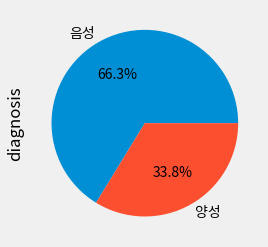

In [20]:
df_raw['diagnosis'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

**불균형자료**

: 목표변수의 분포가 매우 치우친, 즉 관심있는 값의 빈도가 매우 작은 자료로 모델을 사용하여서 예측을 하면 정확도(accuracy)는 높지만 재현율(recall, 실제 1을 1로 분류할 확률)이 급격히 작아져 모델의 성능이 안좋아진다.

: 해결방법에는 정상자료는 일부만 사용하고 관심자료는 전부 사용하는 Under-sampling, 정상자료를 전부 사용하고 관심자료를 복제하는 Over-sampling, 정상자료 및 관심자료를 둘 다 줄이고 늘리는 Both-sampling, 기존 데이터의 성격을 크게 해치지 않는 범위에서 새로운 것을 만들어내는 Synthetic 등의 방법이 있다.

- 불균형 자료를 해결하기 전에 train dataset과 test dataset을 나눠야하는데 이는 train 데이터로 모델을 학습시키고 학습시킨 모델을 test 데이터로 성능을 평가하기 때문이다. 만약 데이터를 나누기 전에 데이터를 복제해버리면 train data와 test data에 동일한 데이터가 들어가 모델의 성능이 지나치게 높게 보일 수도 있다.

- 보통은 9:1로 기준을 설정한다.

- 현재 분석대상인 유방암 데이터의 음성과 양성을 pie plot으로 비교해 보았을 때 음성 66:34로 비율이 그렇게 큰 차이가 나지는 않아 따로 Oversampling이나 Undersampling을 진행하지 않는다.

# 1) 데이터 구성하기 - 데이터 분할(6:4)

- 데이터를 분할할 때 6:4, 7:3, 8:2 와 같은 기준은 데이터분석가가 임의로 정하는데 이는 학습할 데이터의 양에 따라 결정된다. 예를 들어 전체 데이터 개수가 엄청 많은 경우 6:4로 분할하여도 학습할 데이터 수가 충분히 많기 때문에 테스트 데이터를 많이 두어 모델의 일반화 성능을 보는 것이 좋을테지만 데이터 수가 적을 경우 모델이 충분히 학습하는 것이 중요하기 때문에 8:2 로 split하는 경우도 있다. 이 과제에서는 6:4로 split 하라고 명시되어있으니 6:4로 split하였다.

In [23]:
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print('분할 전 설명변수 데이터:' ,df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape,'Test', df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터:Train (192, 30) Test (128, 30)


## 2. SVC 모델 생성 (기본 옵션으로 모델 생성)

In [24]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

svm_uncustomized

Accuracy on training set: 0.885
Accuracy on test set: 0.891


SVC(random_state=1234)

- 기본 모델의 정확도는 train dataset의 경우 0.885이고 test dataset의 경우 0.891이다. 성능이 그렇게 좋은 편은 아니지만 train dataset 과 test dataset의 성능이 비슷하고 오히려 test dataset의 성능이 높은 것을 보아 일반화가 잘 되어 있는 모델이라고 판단할 수 있다.

## 3-1. C: 규제에 대한 강도 변경

In [40]:
train_accuracy = []; test_accuracy = []

para_c = [0.1 * c for c in range(1,200)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))df_train_x

df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

In [41]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.854,0.859
1,0.2,0.875,0.867
2,0.3,0.880,0.875
3,0.4,0.880,0.867
4,0.5,0.880,0.867
...,...,...,...
194,19.5,0.917,0.930
195,19.6,0.917,0.930
196,19.7,0.917,0.930
197,19.8,0.917,0.930


In [44]:
df_accuracy_c.iloc[100:150,:]

,C,TrainAccuracy,TestAccuracy
100,10.1,0.906250,0.921875
101,10.2,0.906250,0.921875
102,10.3,0.906250,0.921875
103,10.4,0.906250,0.921875
104,10.5,0.906250,0.929688
105,10.6,0.906250,0.929688
106,10.7,0.906250,0.929688
107,10.8,0.906250,0.937500
108,10.9,0.906250,0.937500
109,11.0,0.906250,0.937500


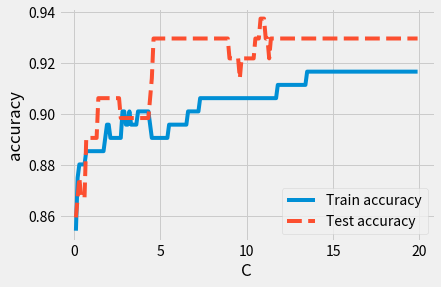

In [42]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

- train dataset과 test dataset을 보았을 때 train dataset의 score가 수렴하는 C값이 13.5일 때로 고정한다. C 값이 작을수록 오류를 많이 허용하여 과소적합이 날 수 있고 C가 클수록 오류를 적게 허용해 과대 적합이 일어날 수 있다.

# 3-2. gamma 변경

In [59]:
train_accuracy = []; test_accuracy =[]
para_gamma = [10**gamma for gamma in range(-5,2)]
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=13.5, random_state =1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

In [60]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.0000,0.9271,0.9375
1,0.0001,0.9844,0.9219
2,0.0010,1.0000,0.9141
3,0.0100,1.0000,0.7969
4,0.1000,1.0000,0.7656
5,1.0000,1.0000,0.7656
6,10.0000,1.0000,0.7656


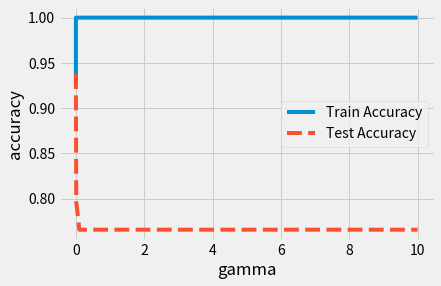

In [61]:
df_accuracy_gamma.round(4)
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.legend()많이

In [62]:
df_train_x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
60,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.1478,0.22560,0.30090,0.09722,0.3849,0.08633
214,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.50460,0.68720,0.21350,0.4245,0.10500
27,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.1562,0.30550,0.41590,0.21120,0.2689,0.07055
65,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.1223,0.19490,0.17090,0.13740,0.2723,0.07071
218,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.15420,0.12770,0.06560,0.3174,0.08524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.1309,0.23270,0.25440,0.14890,0.3251,0.07625
53,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,...,25.28,25.59,159.80,1933.0,0.1710,0.59550,0.84890,0.25070,0.2749,0.12970
294,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
211,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666


- train dataset과 test dataset에서 모두 gamma의 값에 따라 값이 수렴하는 분포를 띈다. 이는 변수의 스케일 조정이 되지 않아 그런 것으로 보인다. 예를 들어 mean_radius와 mean_smoothness를 보면 스케일 차이가 너무 많이 나는 것을 볼 수 있다. 그렇기 때문에 train과 test의 성능차이가 많이 나는 것으로 추정된다. 그렇기 때문에 스케일링을 진행한다.

# 4. scale 변환 with StandardScaler

In [63]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [65]:
svm_scaled = SVC(random_state =1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("스케일링 후 Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("스케일링 후 Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

스케일링 후 Accuracy on training set: 0.995
스케일링 후 Accuracy on test set: 0.961


- 스케일링 전 Accuracy on training set: 0.885
- 스케일링 전 Accuracy on test set: 0.891

- 설명변수 값의 구간을 동일하게 변경한 결과 train과 test dataset의 정확도가 상당히 많이 올라간 것을 알 수 있다. 이는 default model로 진행한 것인데 하이퍼파라미터 튜닝을 하지 않음에도 불구하고 정확도가 train dataset은 0.11, test dataset은 0.07 올라간 것을 볼 수 있다. 이것으로 svm 모델에 변수 scaling 이 필수적이라는 것을 알 수 있다.

# 5. scale 조절 후 모델 parameter 변경 - C

In [77]:
train_accuracy=[]; test_accuracy=[]
para_c = [10**c for c in range(-4,2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

In [78]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.000,0.599,0.758
1,0.001,0.599,0.758
2,0.010,0.599,0.758
3,0.100,0.964,0.906
4,1.000,0.995,0.961
5,10.000,1.000,0.961


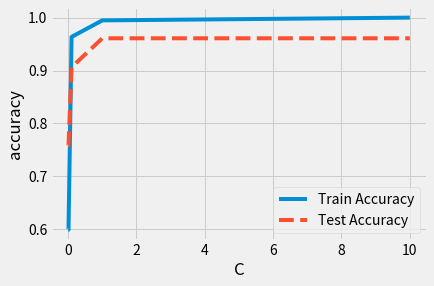

In [79]:
plt.plot(para_c, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

- C, 즉 규제에 대한 강도를 변경하면서 train과 test dataset에 대한 정확도를 찍어보았다. C값이 1.0 일때 train dataset은 0.995로 상당히 좋은 성능을 보이고, test dataset은 0.961로 수렴한다. 그렇기 때문에 C 값을 1.0으로 설정한다. train dataset의 score는 비이상적으로 높지만 test dataset의 score 또한 train dataset의 score와 차이가 얼마 나지 않기 때문에 설정하였다.

# 6. scale 조절 후 모델 parameter 변경 - gamma

In [86]:
train_accuracy = []
test_accuracy = []
para_gamma = [10**gamma for gamma in range(-4, 2)]
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

In [89]:
df_accuracy_gamma.round(5)

,gamma,TrainAccuracy,TestAccuracy
0,0.0001,0.59896,0.75781
1,0.0010,0.98438,0.92969
2,0.0100,0.99479,0.93750
3,0.1000,1.00000,0.92188
4,1.0000,1.00000,0.77344
5,10.0000,1.00000,0.76562


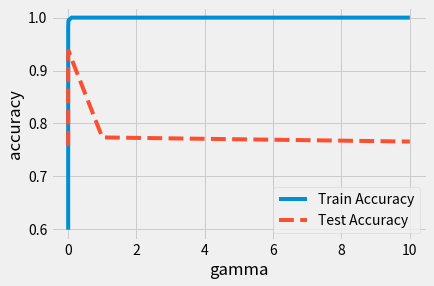

In [90]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

- plotting 결과와 정확도에 대한 데이터프레임을 보면 gamma가 0.001일 때 정확도가 가장 높다. 일반적으로 gamma가 작을수록 곡률이 커져 모델의 복잡도가 증가한다. 이에 따라 정확도가 증가하는 것이 일반적이지만 정확도가 떨어지는 것으로 보아 데이터의 분포가 kernel의 default parameter가 알맞지 않은 것으로 보인다.

In [91]:
svc_final=SVC(gamma=0.001,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred=svc_final.predict(df_scaled_test_x)
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set: 0.984
Accuracy on test set: 0.930

Confusion matrix:
[[29  2]
 [ 7 90]]
              precision    recall  f1-score   support

          양성      0.806     0.935     0.866        31
          음성      0.978     0.928     0.952        97

    accuracy                          0.930       128
   macro avg      0.892     0.932     0.909       128
weighted avg      0.936     0.930     0.931       128



- 스케일링 후 Accuracy on training set: 0.995
- 스케일링 후 Accuracy on test set: 0.961

- 최적의 C값인 1과 gamma값인 0.001을 하이퍼파라미터로 설정한 결과 스케일링 후 default값으로 구성한 모델보다 성능이 좋지 않았다.

- 유방암 데이터이기 때문에 recall값이 높은 것은 고무적이지만 default 모델보다 tuning한 모델이 성능이 좋지 않았다. 그렇기에 kernel에 대한 하이퍼파라미터 또한 grid search의 딕셔너리에 넣은 후 최적의 모델을 찾고자 한다.

In [95]:
estimator=SVC(random_state=1234)
param_grid={"C":para_c,
           "gamma":para_gamma,
           'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}
grid_rf=GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parametor:\n{}".format(grid_rf.best_params_))
print("\nbest score(train):\n{}".format(grid_rf.best_score_.round(3)))

best estimator model:
SVC(C=10, gamma=0.01, random_state=1234)

best parametor:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

best score(train):
0.989


In [96]:
print('best score(test):\n{}'.format(grid_rf.best_estimator_.score(df_scaled_test_x,df_test_y)))

best score(test):
0.9609375


- 결론적으로 scaling을 한 데이터셋으로 모델링을 진행한 결과가 scaling 이전의 score보다 훨씬 좋으므로 SVM모델을 사용할 때에는 scaling이 필수적이라는 것을 알 수 있다.